In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, exp
from scipy import fft

In [2]:
# v = np.zeros(1001, dtype=float)
nz = 1001
dz = 10
c = 3000
pho = 3000
c_33 = c * c * pho
t_max = 1.
nt = 1001
dt = t_max / nt
t_array = np.linspace(0, t_max, nt)
f_m = 25
pml_len = 5

In [3]:
source_array = np.zeros(int(0.04/dt) * 2 + 1)
for tk , t in enumerate(np.arange(0, 0.04 * 2, dt)):
    source_array[tk] = \
        (1 - 2 * (pi * f_m * (t-0.04))**2) * \
            exp(-(pi * f_m * (t-0.04))**2)

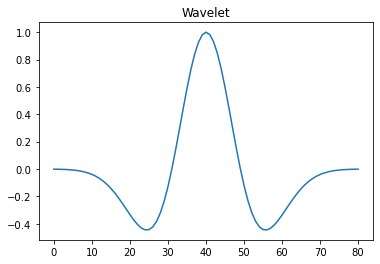

In [4]:
plt.plot(source_array)
plt.title('Wavelet')
plt.show()

In [5]:
v = np.zeros((nz,nt), dtype=float)  
u = np.zeros(nz, dtype=float)
tau = np.zeros(nz, dtype=float)
phi = np.zeros(nz, dtype=float)
omega = np.zeros(nz, dtype=float)
z_spacing = np.linspace(0, nz, nz)
kai_max = 2
sigma_max = 1200
alpha_max = 150

kai = np.where(z_spacing<pml_len, (kai_max - 1) \
               * np.power((pml_len-z_spacing)/pml_len,2) + 1,\
                np.where(nz-z_spacing<pml_len, (kai_max - 1) * \
                np.power((z_spacing-nz+pml_len)/pml_len,2) + 1, 1))

sigma = np.where(z_spacing<pml_len, sigma_max \
               * np.power((pml_len-z_spacing)/pml_len,2),\
                np.where(nz-z_spacing<pml_len, sigma_max * \
                np.power((z_spacing-nz+pml_len)/pml_len,2), 0))

alpha = np.where(z_spacing<pml_len, alpha_max \
               * np.power((pml_len-z_spacing)/pml_len,2),\
                np.where(nz-z_spacing<pml_len, alpha_max * \
                np.power((z_spacing-nz+pml_len)/pml_len,2), 0))

c_z = 1 - 1/kai
b_z = np.exp(-1*(alpha + sigma/kai)*dt)
a_z = np.where(sigma==0,0,(1-b_z)*sigma/(kai*(kai*alpha+sigma)))

<ipython-input-5-407a4b87e983>:28: RuntimeWarning: invalid value encountered in true_divide
  a_z = np.where(sigma==0,0,(1-b_z)*sigma/(kai*(kai*alpha+sigma)))


[0.21091176 0.21804821 0.19482612 ... 0.19482612 0.21804821 0.21091176]


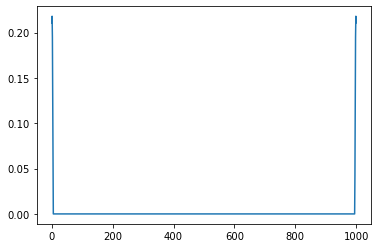

[2.         1.63968004 1.35952016 ... 1.35952016 1.63968004 2.        ]


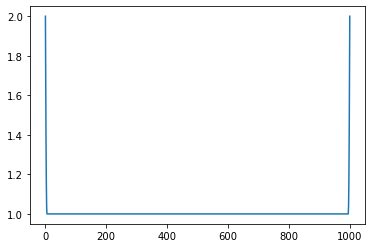

In [6]:
plt.plot(a_z)
print(a_z)
plt.show()
plt.plot(kai)
print(kai)
plt.show()

In [7]:
kernal_u = np.array([0, 1, -1])
kernal_tau = np.array([1, -1, 0])

for tk, tt in enumerate(t_array):
    if tk > 0:
        
        u_z = np.convolve(u, kernal_u, mode='same') / dz
        tau = c_33 * (1/kai * u_z - phi) * dt  + tau      
        # tau = c_33 * (u_z) * dt + tau      
        tau_z = np.convolve(tau, kernal_tau, mode='same') / dz
        omega = b_z * omega + a_z * tau_z
        u = (1/kai * tau_z - omega) * dt / pho + u
        # u = (tau_z) * dt / pho + u
        # phi = b_z * phi + a_z * u_z
        
        if (tk < len(source_array)):
            u[500] += source_array[tk]
        v[:,tk] = u

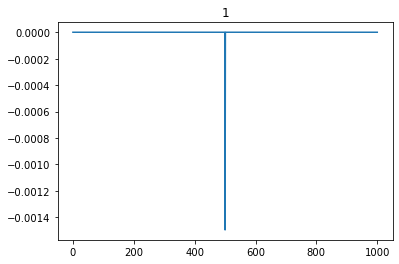

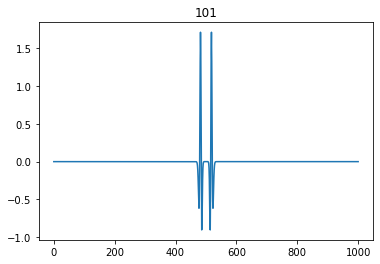

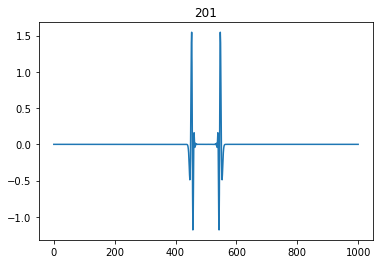

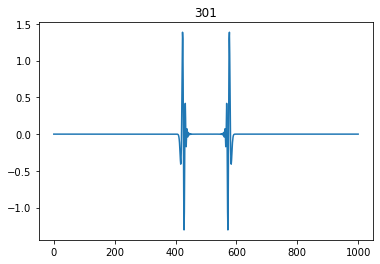

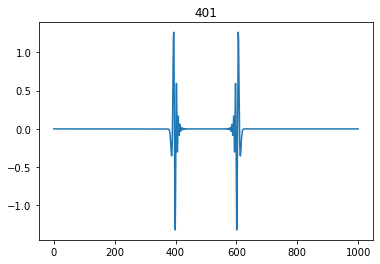

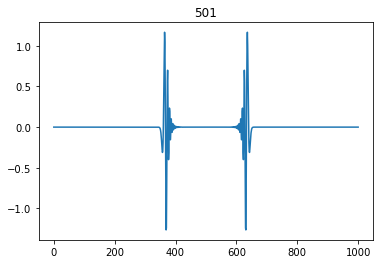

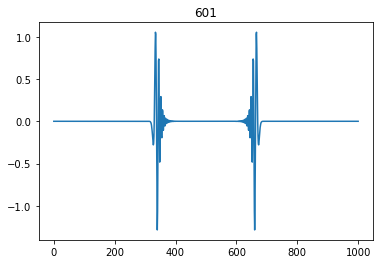

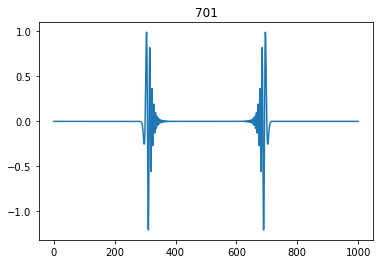

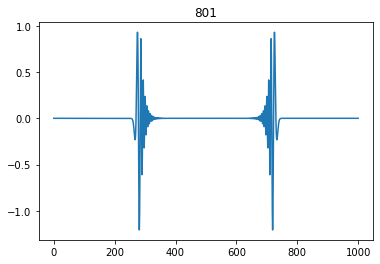

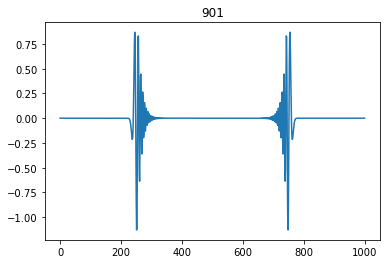

In [8]:
for tk, tt in enumerate(t_array):
    if tk % 100 == 1:
        plt.plot(v[:,tk])
        plt.title(str(tk))
        plt.show()

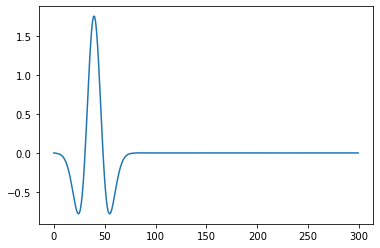

In [15]:
# a = np.where(v[500,:]!=0)
# plt.plot(v[500,a[0][0]:a[0][0]+100])
plt.plot(v[500,0:300])
plt.show()

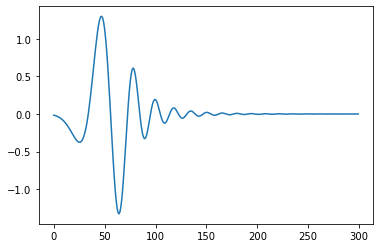

In [14]:
plt.plot(v[600,int((100*dz)/(c*dt)):int((100*dz)/(c*dt))+300])
plt.show()

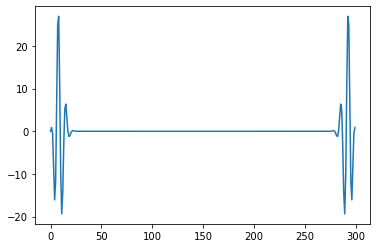

In [16]:
result_500 = np.fft.fft(v[500,0:300])
plt.plot(result_500.real)
plt.show()

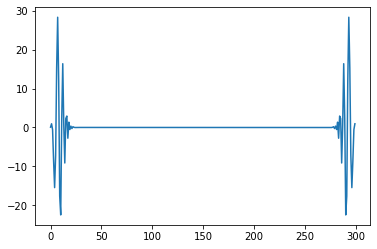

In [17]:
result_600 = np.fft.fft(v[600,int((100*dz)/(c*dt)):int((100*dz)/(c*dt))+300])
plt.plot(result_600.real)
plt.show()

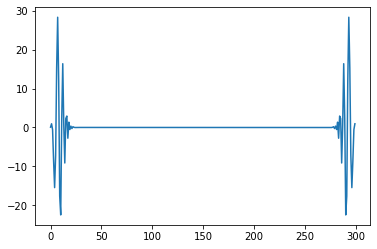

In [18]:
result_400 = np.fft.fft(v[400,int((100*dz)/(c*dt)):int((100*dz)/(c*dt))+300])
plt.plot(result_400.real)
plt.show()

In [19]:
print(all(result_400==result_600))

True


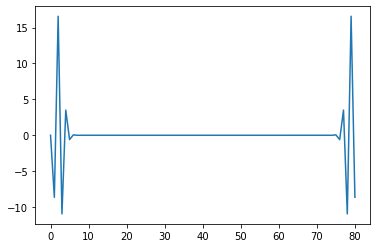

In [20]:
fft_source = np.fft.fft(source_array)
plt.plot(fft_source.real)
plt.show()

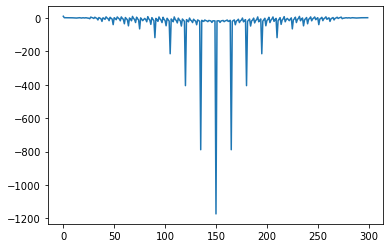

In [21]:
F_100 = result_400/(result_500+pow(10,-7))
plt.plot(F_100.real)
plt.show()

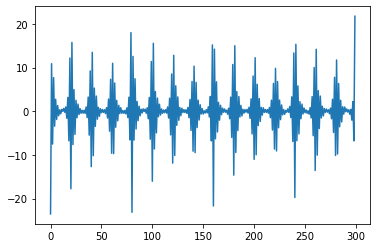

In [22]:
f_100 = np.fft.ifft(F_100)
plt.plot(f_100.real)
plt.show()

In [24]:
cor_100 = np.convolve(v[400,int((100*dz)/(c*dt)):int((100*dz)/(c*dt))+300], f_100, mode='same')

In [25]:
print(cor_100)

[-4.39507642e-01-1.08122682e-12j -3.95424543e-01-8.77437858e-12j
 -3.01342360e-01-2.63477339e-12j -1.55294985e-01-4.80630146e-12j
  2.03629892e-03-1.61350174e-12j  1.66803457e-01+1.03225453e-12j
  2.83400004e-01+1.54421398e-13j  3.87700790e-01+6.42040201e-12j
  3.63440320e-01+3.12148986e-13j  4.29911525e-01+8.00109259e-12j
  1.15935530e-01-2.40645863e-14j  3.00661591e-01+4.85068314e-12j
 -3.32775558e-02-1.36400709e-12j -7.88863570e-02+2.96045800e-13j
 -2.85897145e-01-2.30323381e-12j -2.90354147e-01-4.19911952e-12j
 -3.38124234e-01-9.96534844e-13j -2.76997002e-01-6.13497567e-12j
 -2.21139449e-01+1.74073150e-12j -1.06831309e-01-5.06302771e-12j
 -3.07325647e-03+4.17242583e-12j  1.05909823e-01-1.75753093e-12j
  1.79879151e-01+4.42204371e-12j  2.29168346e-01+1.39082853e-12j
  2.31927033e-01+2.79824145e-12j  2.10844498e-01+2.48479484e-12j
  1.40425995e-01-7.57236872e-13j  8.90948722e-02+2.97497397e-12j
 -3.82510652e-02-4.82088889e-12j -1.87342518e-02+2.39960077e-12j
 -2.23953493e-01-5.668584

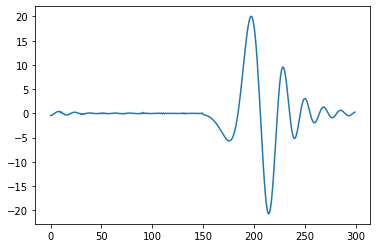

In [28]:
plt.plot(cor_100.real)
# plt.plot(v[400,:])
# plt.plot(v[500,:])
plt.show()

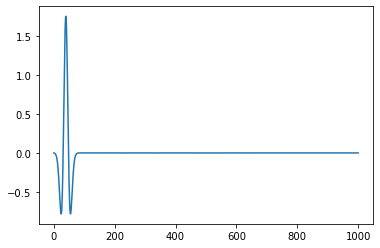

In [35]:
plt.plot(v[500,:])
plt.show()

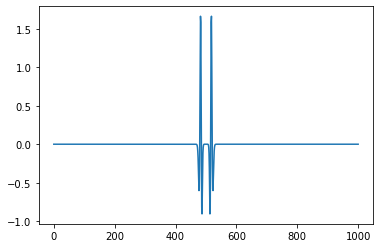

In [54]:
plt.plot(v[:,100])
plt.show()

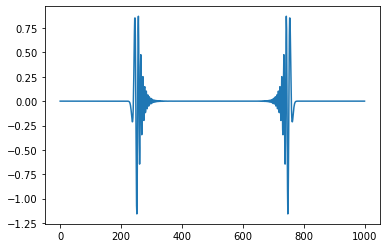

In [55]:
plt.plot(v[:,900])
plt.show()